# Capstone Project

----

**TASK: Import any libraries you think you will use:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [9]:
fandango.head(15)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [10]:
fandango.info(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [12]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

<Axes: xlabel='VOTES', ylabel='STARS'>

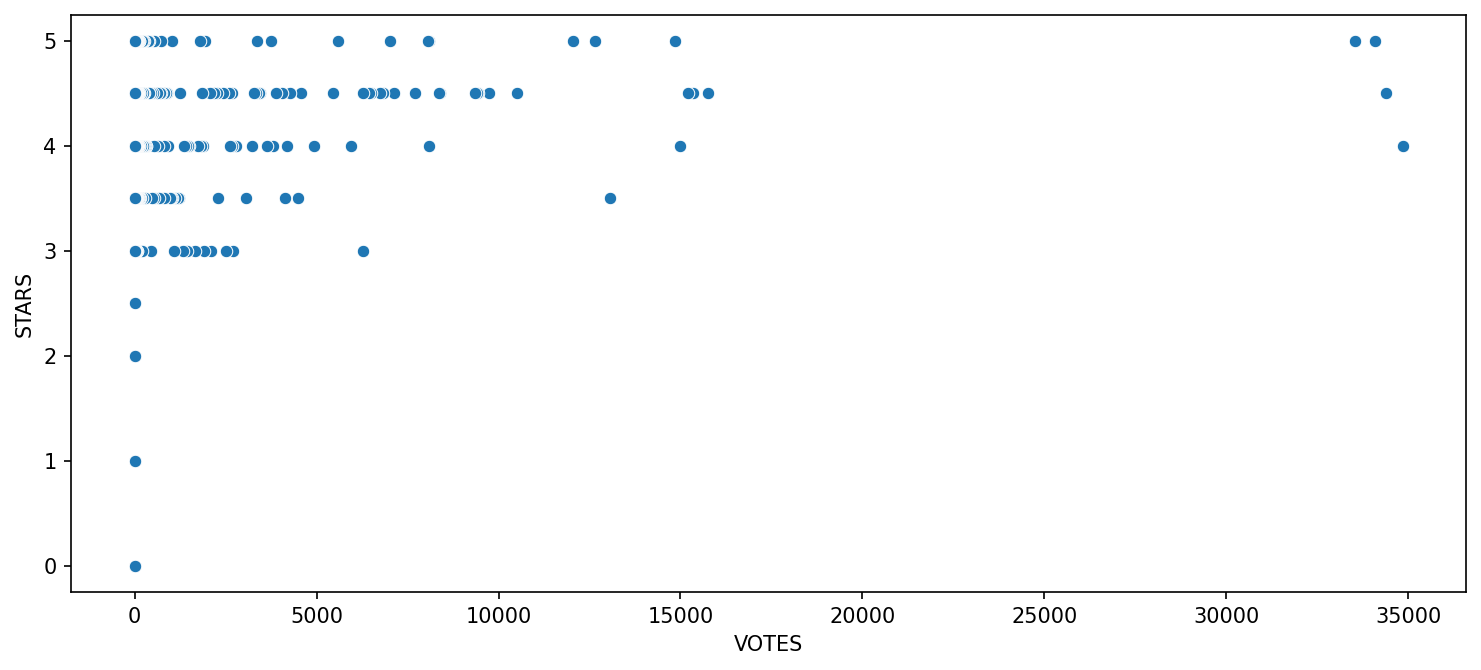

In [15]:
plt.figure(figsize=(12,5), dpi=150)
sns.scatterplot(data=fandango, x= 'VOTES', y='STARS')

**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [17]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

**TASK: How many movies are in the Fandango DataFrame per year?**

In [18]:
fandango['YEAR'].value_counts()

YEAR
2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: count, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

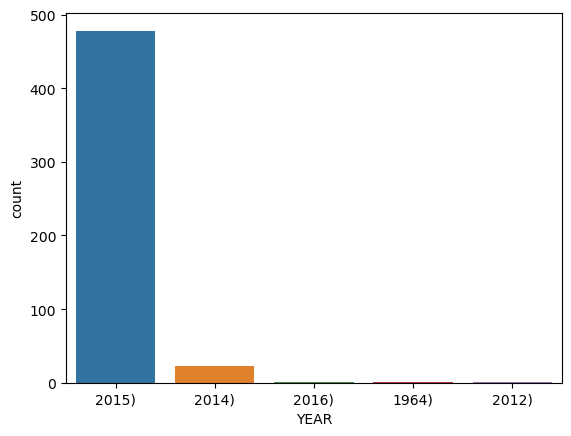

In [9]:
sns.countplot(data=fandango, x='YEAR')

**TASK: What are the 10 movies with the highest number of STARS?**

In [20]:
fandango.nlargest(10, 'STARS')

,FILM,STARS,RATING,VOTES,YEAR
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
10,Cinderella (2015),5.0,4.5,12640,2015)
11,Ant-Man (2015),5.0,4.5,12055,2015)
19,Straight Outta Compton (2015),5.0,4.8,8096,2015)
21,The Imitation Game (2014),5.0,4.6,8055,2014)
24,Selma (2014),5.0,4.6,7025,2014)
32,Southpaw (2015),5.0,4.6,5597,2015)
43,Dragon Ball Z: Resurrection 'F' (2015),5.0,4.8,3740,2015)


**TASK: How many movies have zero votes?**

In [21]:
no_votes = fandango['VOTES']==0
no_votes.sum()

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [22]:
fan_reviewed = fandango[fandango['VOTES']>0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

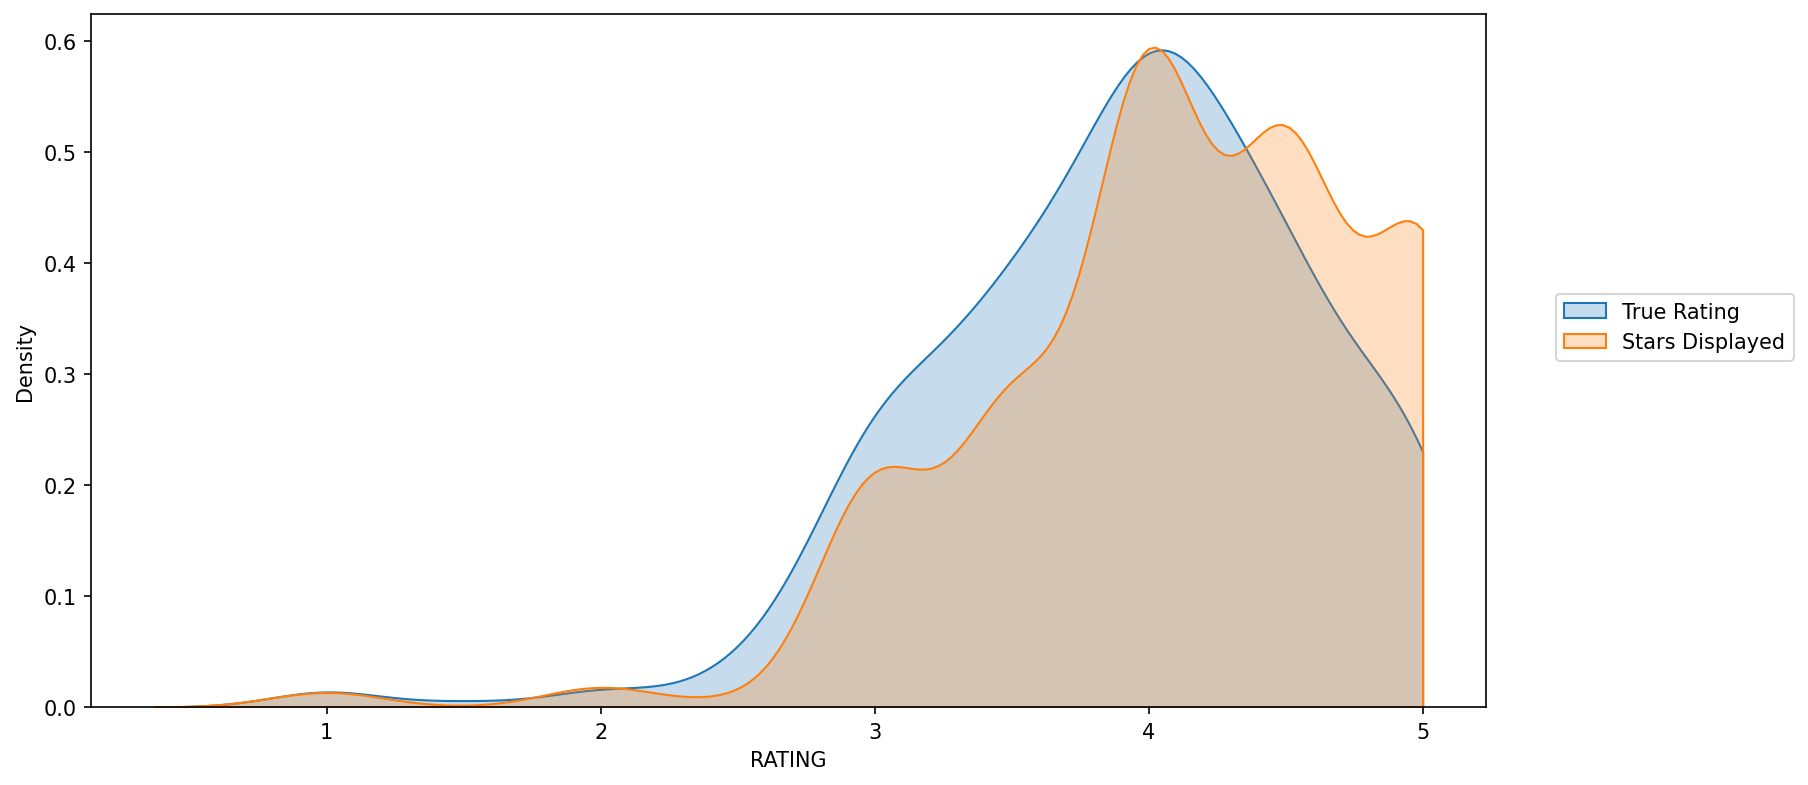

In [26]:
plt.figure(figsize=(12,6), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill= True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [29]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(3)

C:\Users\deiva\AppData\Local\Temp\ipykernel_5896\328324348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\deiva\AppData\Local\Temp\ipykernel_5896\328324348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(3)


In [30]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

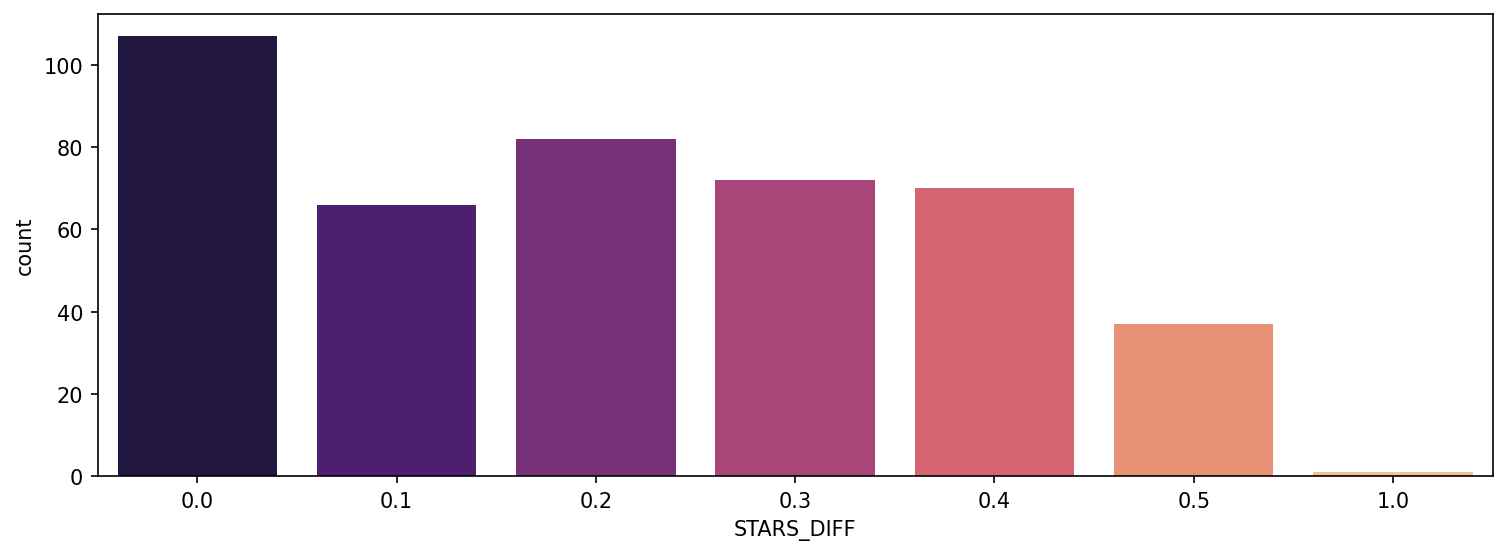

In [31]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

**TASK: We can see from the plot that one movie was displaying over a 0.5 star difference than its true rating! What movie had this close to 0.5 star differential?**

In [34]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 0.5]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015),0.5
10,Cinderella (2015),5.0,4.5,12640,2015),0.5
11,Ant-Man (2015),5.0,4.5,12055,2015),0.5
50,Top Five (2014),4.0,3.5,3223,2014),0.5
70,Do You Believe? (2015),5.0,4.5,1793,2015),0.5
85,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,2015),0.5
89,Shaun the Sheep Movie (2015),4.5,4.0,896,2015),0.5
90,Love & Mercy (2015),4.5,4.0,864,2015),0.5
94,Far From The Madding Crowd (2015),4.5,4.0,804,2015),0.5
110,The Water Diviner (2015),4.5,4.0,397,2015),0.5


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file by running the cell below**

In [35]:
all_sites = pd.read_csv('all_sites_scores.csv')

**TASK: Explore the DataFrame columns, info, description.**

In [36]:
all_sites.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
5,The Water Diviner (2015),63,62,50,6.8,7.2,34,39373
6,Irrational Man (2015),42,53,53,7.6,6.9,17,2680
7,Top Five (2014),86,64,81,6.8,6.5,124,16876
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227
9,Love & Mercy (2015),89,87,80,8.5,7.8,54,5367


In [37]:
all_sites.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [38]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

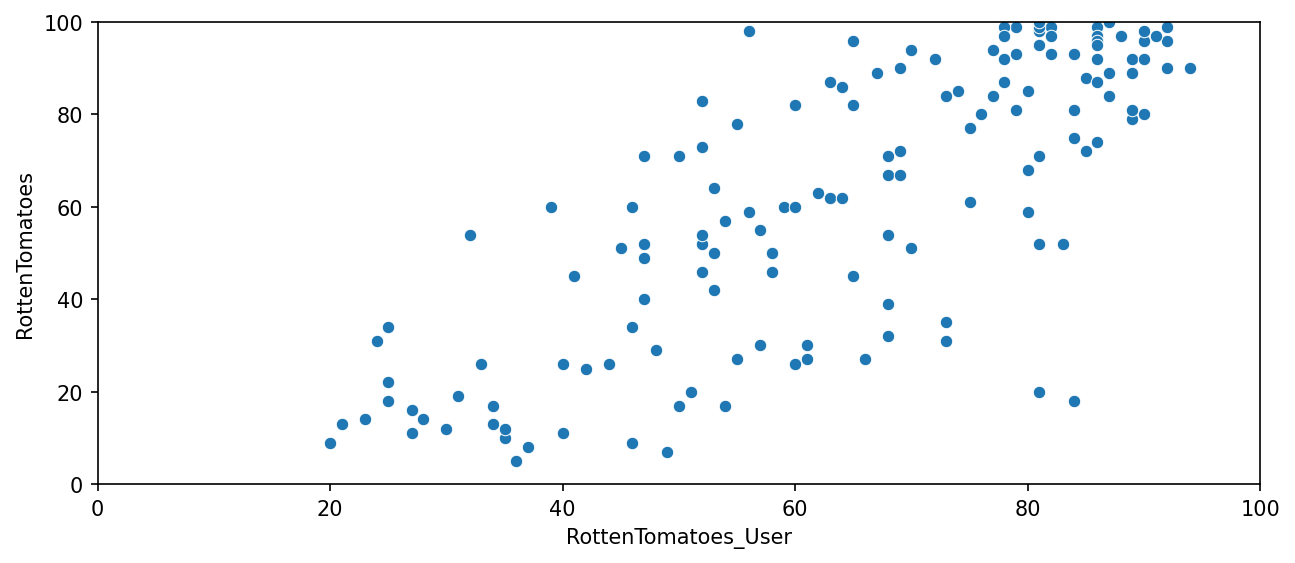

In [43]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes_User', y='RottenTomatoes')
plt.xlim(0,100)
plt.ylim(0,100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [44]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [45]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

Text(0.5, 1.0, 'differences between RT Critics Score and RT User Score')

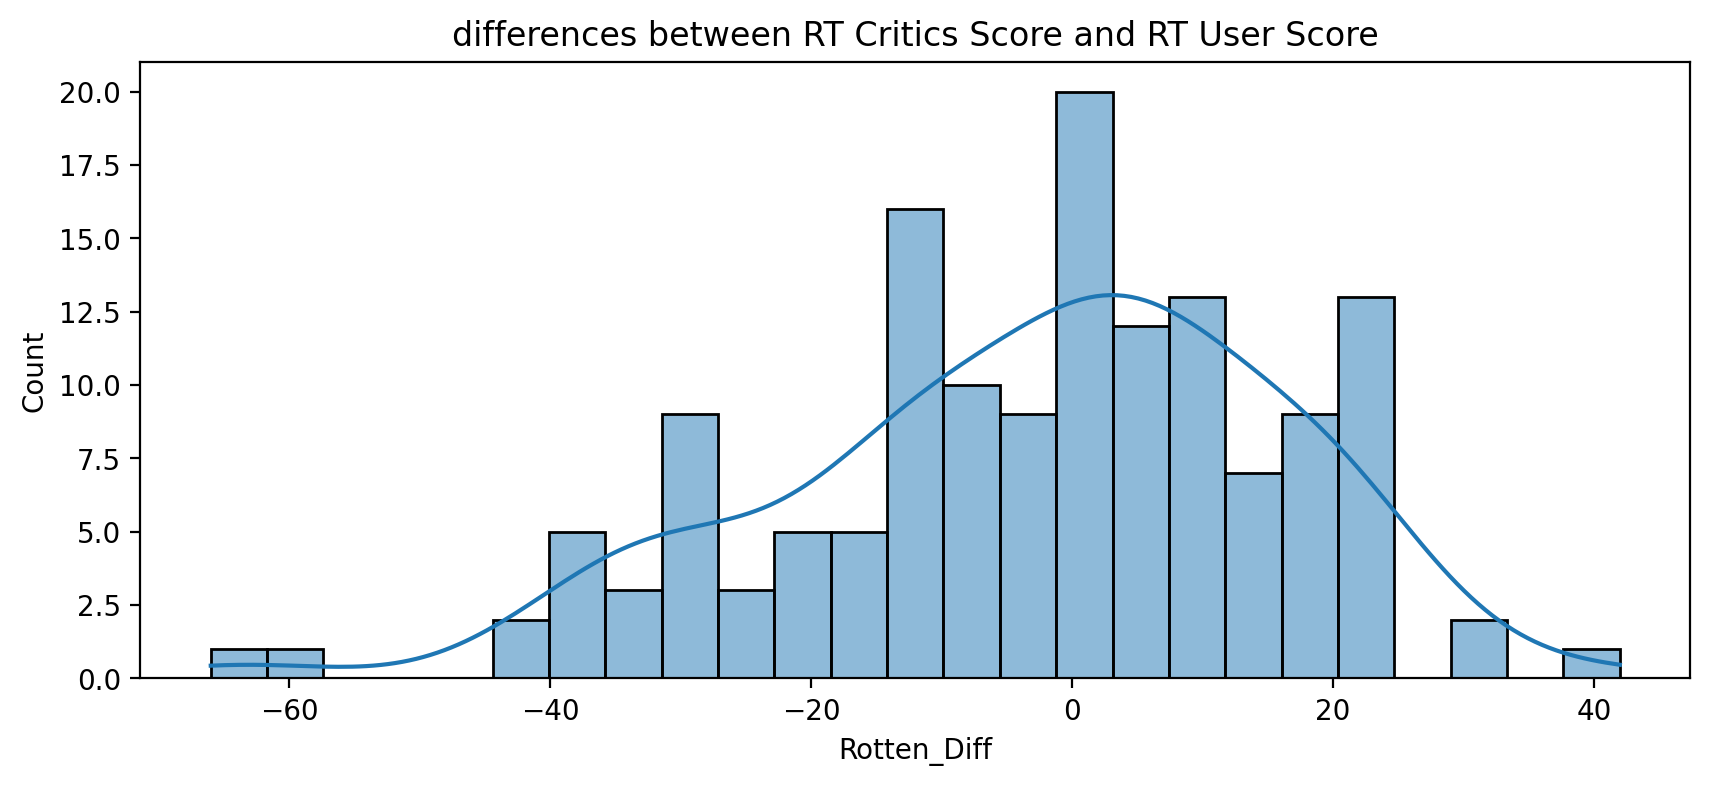

In [47]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title("differences between RT Critics Score and RT User Score")

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, '*absolute value* difference between Critics and Users on Rotten Tomatoes')

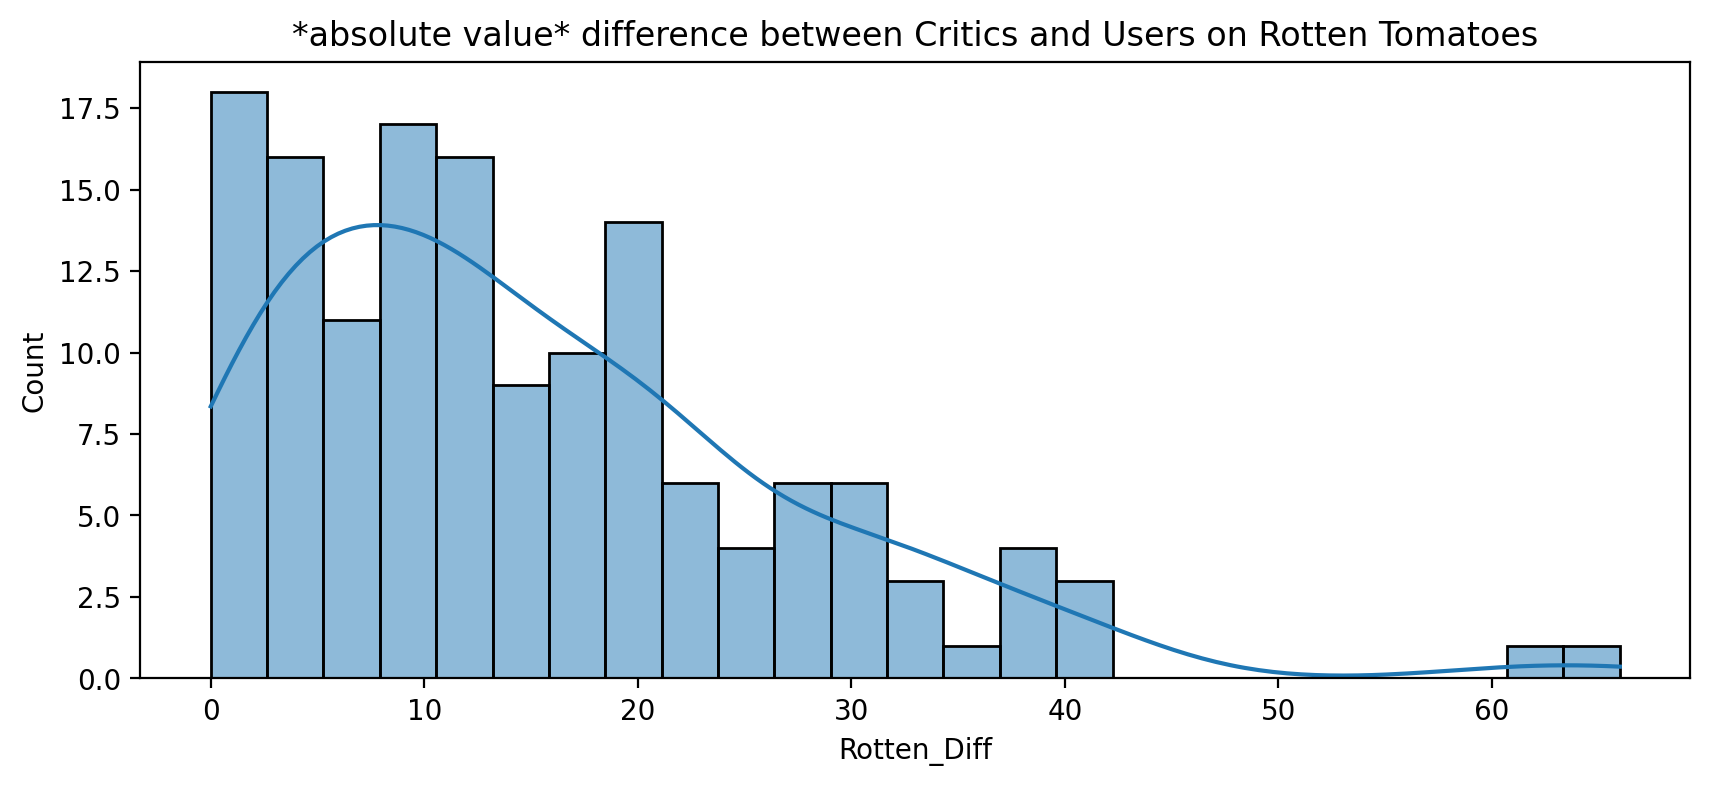

In [48]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)
plt.title("*absolute value* difference between Critics and Users on Rotten Tomatoes")

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 10 movies users rated higher than critics on average:**

In [49]:
print("Users love but critics hate")
all_sites.nsmallest(10, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Users love but critics hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39
132,Max (2015),-38
15,Taken 3 (2015),-37
19,Pixels (2015),-37
51,Entourage (2015),-36
47,Annie (2014),-34


**TASK: Now show the top 10 movies critics scores higher than users on average.**

In [50]:
print("Critics love, but Users Hate")
all_sites.nlargest(10, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24
90,The SpongeBob Movie: Sponge Out of Water (2015),23
7,Top Five (2014),22
11,Black Sea (2015),22
87,Maggie (2015),22


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 100.0)

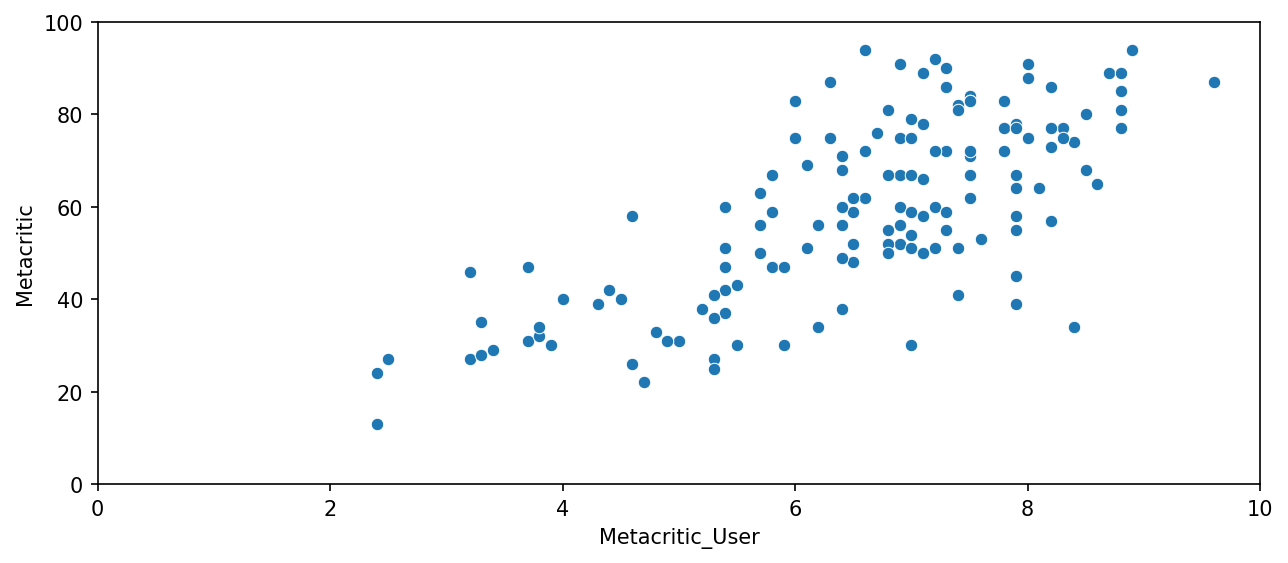

In [52]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_User', y='Metacritic')
plt.xlim(0,10)
plt.ylim(0,100)

## IMBD

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

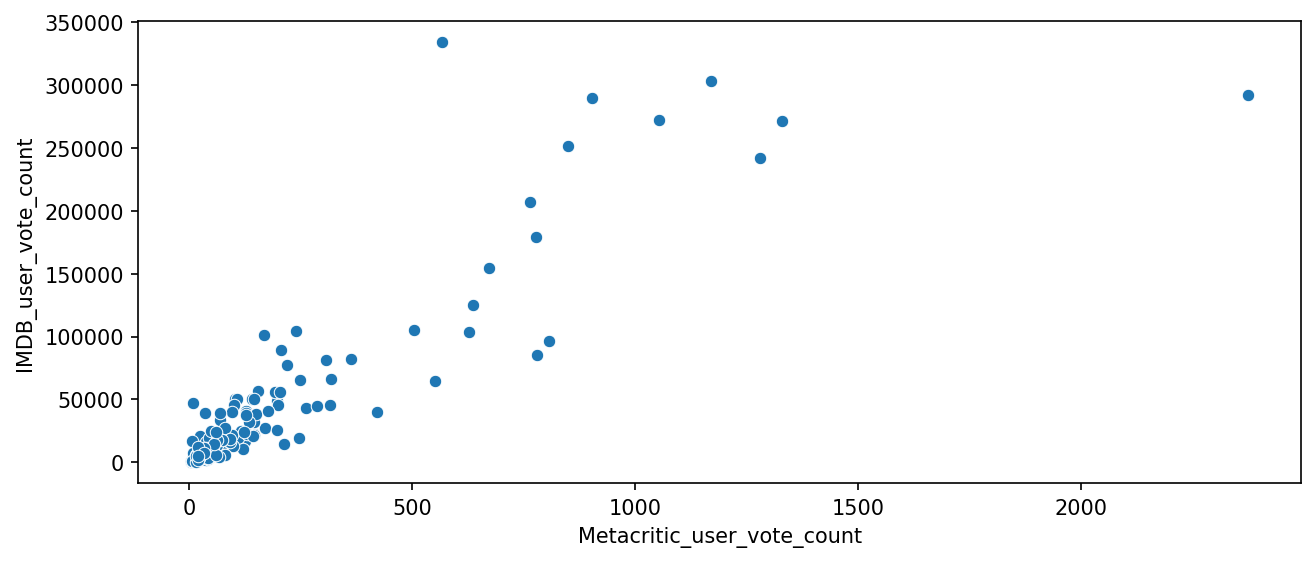

In [53]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [54]:
all_sites.nlargest(2, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2
65,Birdman (2014),92,78,88,8.0,7.9,1171,303505,14


**TASK: What movie has the highest Metacritic User Vote count?**

In [55]:
all_sites.nlargest(2, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [56]:
df = pd.merge(fandango,all_sites, on='FILM', how='inner')

In [58]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [59]:
df.head(10)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014),61,75,59,7.0,7.5,903,289464,-14
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015),75,84,58,7.9,7.8,1054,272204,-9
7,Minions (2015),4.0,4.0,14998,2015),54,52,56,5.7,6.7,204,55895,2
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015),74,86,66,7.1,7.8,1330,271107,-12
9,Into the Woods (2014),3.5,3.4,13055,2014),71,50,69,6.1,6.0,307,81679,21


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [60]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [66]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [68]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [69]:
df.head(10)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014),61,75,59,7.0,7.5,903,289464,-14,3.0,3.8,3.0,3.5,3.8
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015),75,84,58,7.9,7.8,1054,272204,-9,3.8,4.2,2.9,4.0,3.9
7,Minions (2015),4.0,4.0,14998,2015),54,52,56,5.7,6.7,204,55895,2,2.7,2.6,2.8,2.8,3.4
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015),74,86,66,7.1,7.8,1330,271107,-12,3.7,4.3,3.3,3.6,3.9
9,Into the Woods (2014),3.5,3.4,13055,2014),71,50,69,6.1,6.0,307,81679,21,3.6,2.5,3.4,3.0,3.0


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [70]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'Meta_Norm', 'Meta_U_Norm', "IMDB_Norm"]]

In [72]:
norm_scores.head(10)

,STARS,RATING,RT_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.7,4.4,4.3
5,4.5,4.3,3.0,3.0,3.5,3.8
6,4.5,4.2,3.8,2.9,4.0,3.9
7,4.0,4.0,2.7,2.8,2.8,3.4
8,5.0,4.5,3.7,3.3,3.6,3.9
9,3.5,3.4,3.6,3.4,3.0,3.0


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

In [73]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles - old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\deiva\AppData\Local\Temp\ipykernel_5896\3564412342.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1', ax=ax)


NameError: name 'handles' is not defined

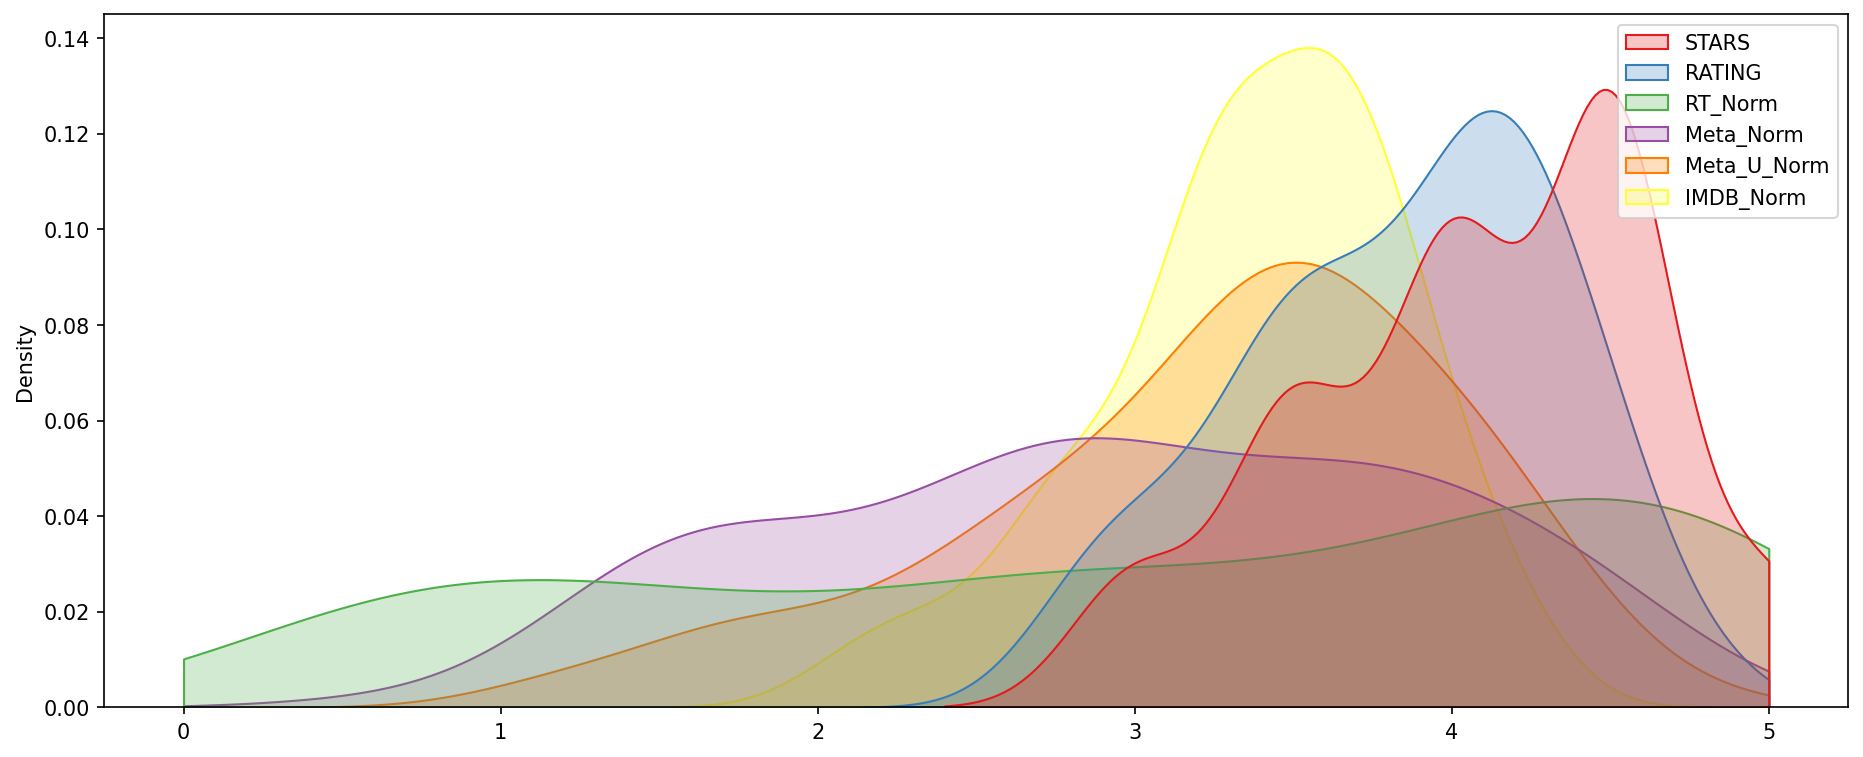

In [74]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

C:\Users\deiva\AppData\Local\Temp\ipykernel_5896\4272579469.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)


NameError: name 'handles' is not defined

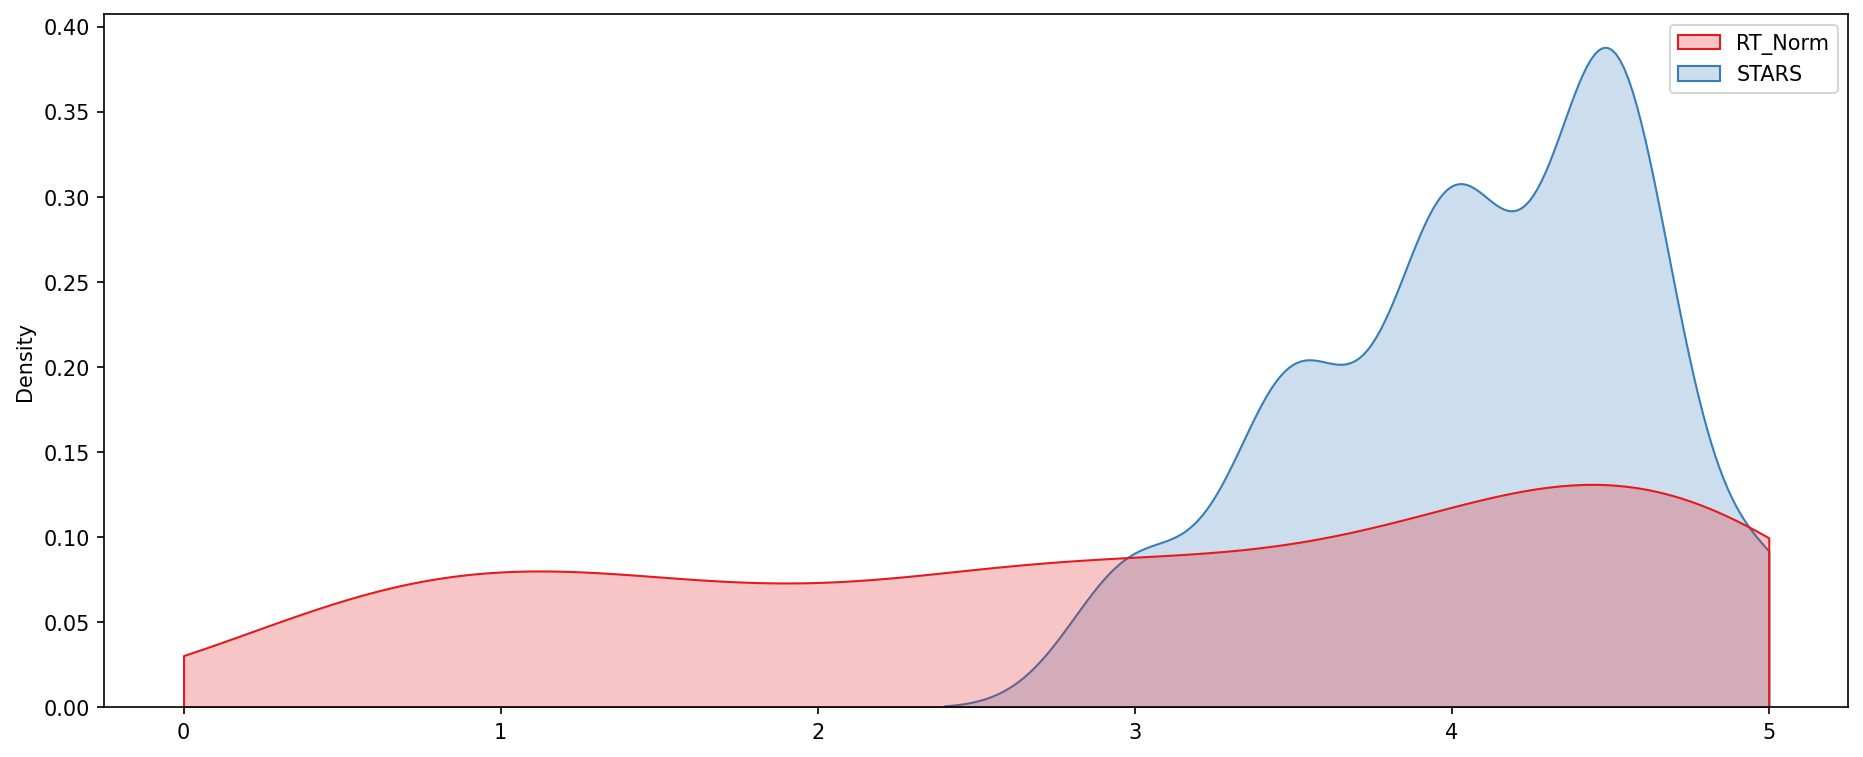

In [75]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

<Axes: ylabel='Count'>

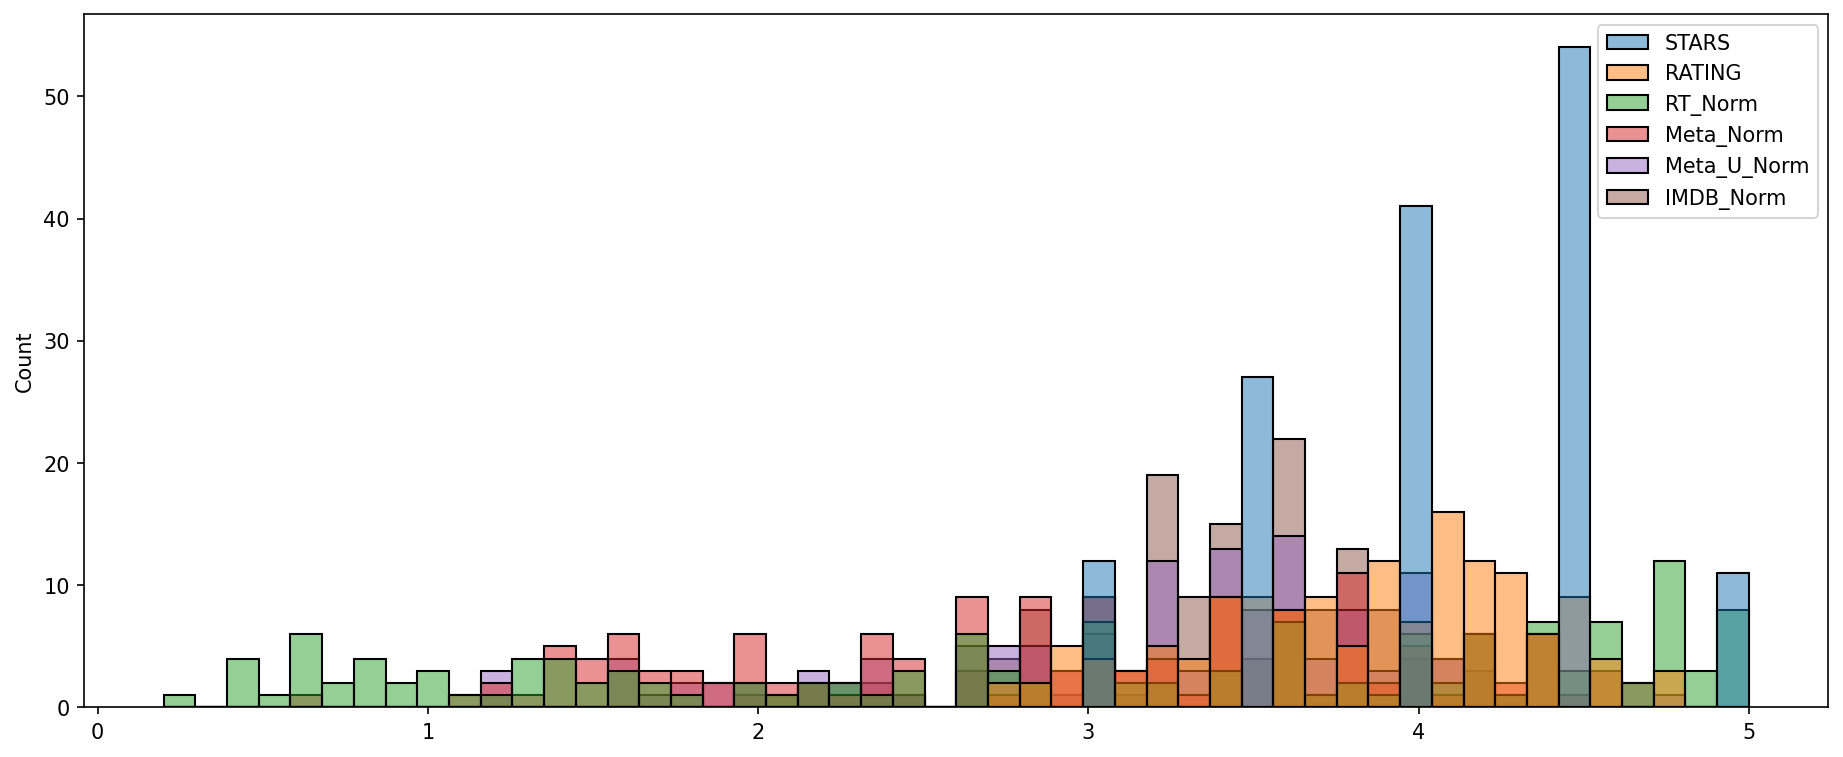

In [76]:
plt.subplots(figsize=(15,6), dpi=150)
sns.histplot(norm_scores, bins=50)


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

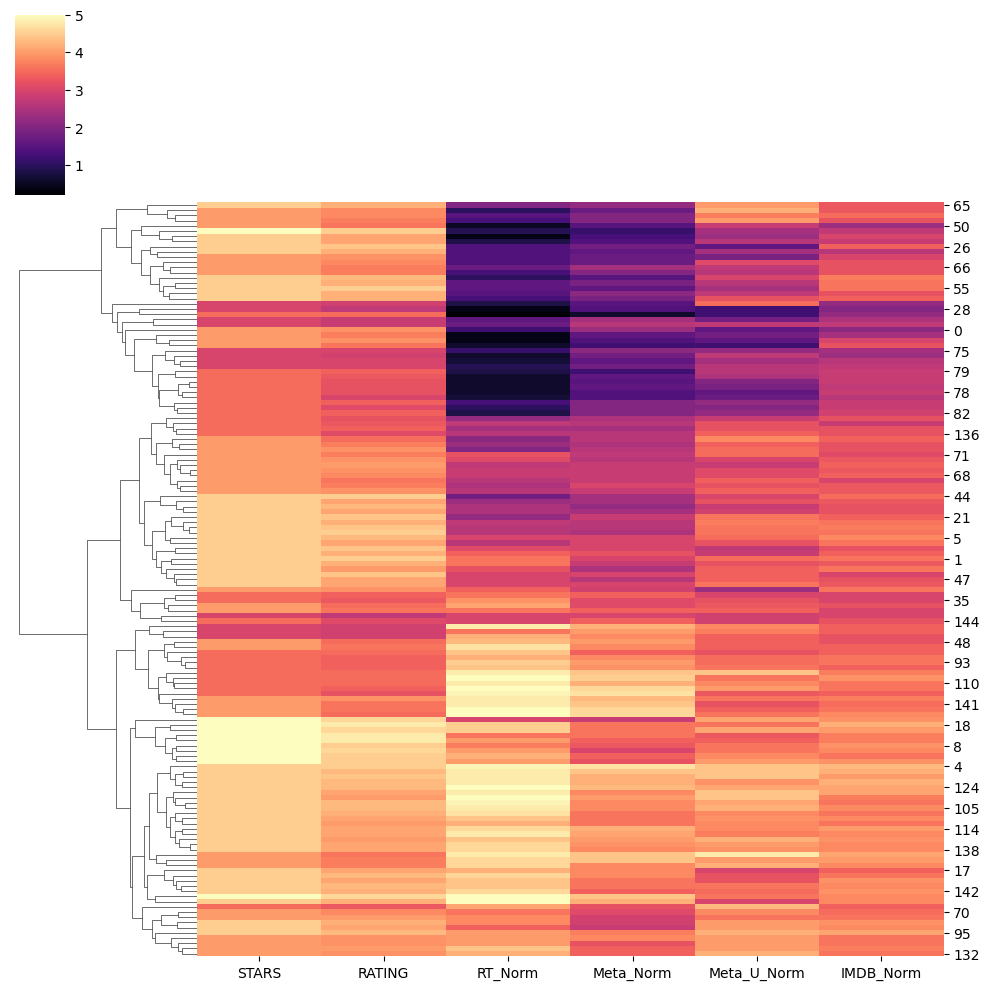

In [77]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [78]:
norm_films = df[['STARS', 'RATING', 'RT_Norm','Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'FILM']]

In [79]:
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.6,1.9,2.7,Unfinished Business (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

C:\Users\deiva\AppData\Local\Temp\ipykernel_5896\2172007374.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films, clip=[0,5], shade=True, palette='Set1')


Text(0.5, 1.0, "Ratings for Rt Critic's 10 worst reviewed films")

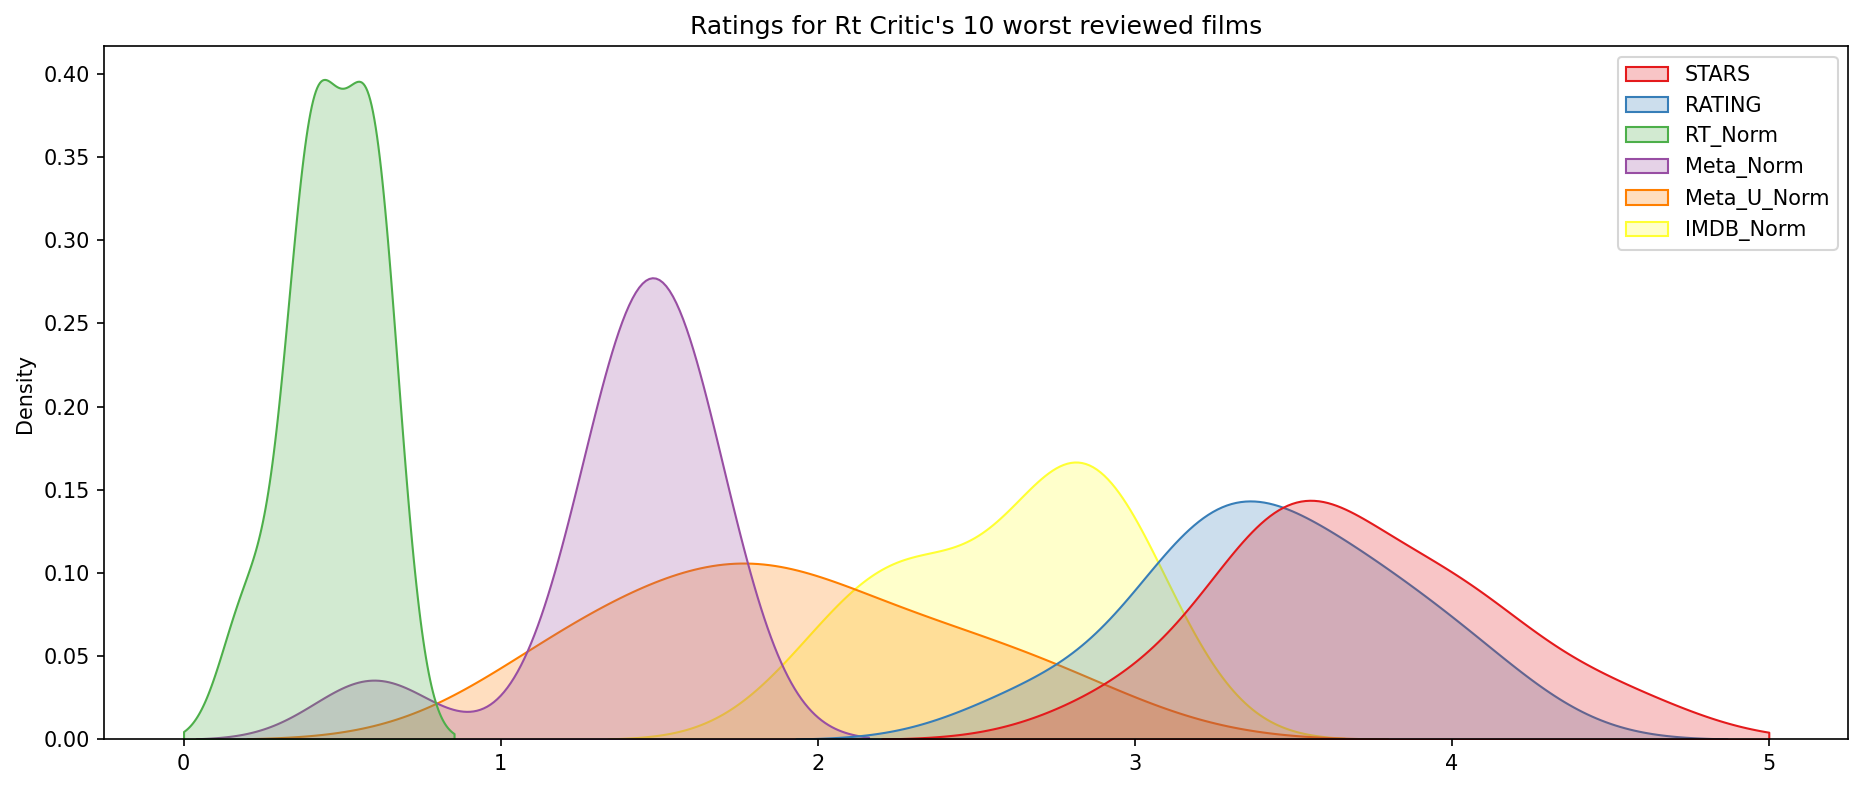

In [80]:
plt.figure(figsize=(15,6), dpi=150)
worst_films = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis=1)
sns.kdeplot(data=worst_films, clip=[0,5], shade=True, palette='Set1')
plt.title("Ratings for Rt Critic's 10 worst reviewed films")

----